# MARYLAND TRAFFIC VIOLATION

In [1]:
#importing libraries 

import numpy as np            #numpy is used for numeric operations.
import pandas as pd           #pandas is used for tabular data.
import seaborn as sns         #seaborn is used for data visualization and exploratory data analysis.


In [2]:
# importing a datafile (i.e .csv file)

df = pd.read_csv('Traffic_Violations.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#looking at the length of the dataset

len(df) 

1292399

In [4]:
#looking at the first rows of the dataframe

df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [5]:
#Getting information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [6]:
#Dropping unwanted columns from the dataframe

df = df.drop(df.columns[[3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 30, 31, 32, 33, 34]], axis=1)

In [7]:
#Looking at the dataframe information after dropping few columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Date Of Stop    1292399 non-null  object
 1   Time Of Stop    1292399 non-null  object
 2   Agency          1292399 non-null  object
 3   Location        1292397 non-null  object
 4   Make            1292342 non-null  object
 5   Model           1292212 non-null  object
 6   Color           1276272 non-null  object
 7   Violation Type  1292399 non-null  object
 8   Gender          1292399 non-null  object
dtypes: object(9)
memory usage: 88.7+ MB


In [8]:
#Displays the dateframe 

df.head()

,Date Of Stop,Time Of Stop,Agency,Location,Make,Model,Color,Violation Type,Gender
0,09/24/2013,17:11:00,MCP,8804 FLOWER AVE,FORD,4S,BLACK,Citation,M
1,08/29/2017,10:19:00,MCP,WISCONSIN AVE@ ELM ST,TOYOTA,COROLLA,GREEN,Citation,F
2,12/01/2014,12:52:00,MCP,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,HONDA,ACCORD,SILVER,Citation,F
3,08/29/2017,09:22:00,MCP,CHERRY HILL RD./CALVERTON BLVD.,DODG,DAKOTA,WHITE,Citation,M
4,08/28/2017,23:41:00,MCP,355 @ SOUTH WESTLAND DRIVE,MINI COOPER,2S,WHITE,Citation,M


In [9]:
#checking the count of violations per type

df['Violation Type'].value_counts()

Warning     620103
Citation    607150
ESERO        64224
SERO           922
Name: Violation Type, dtype: int64

In [10]:
#Checking the count of color cars involved in traffic violation

df['Color'].value_counts()

BLACK          259499
SILVER         236828
WHITE          197558
GRAY           141092
RED            101733
BLUE            94814
GREEN           49520
GOLD            41177
BLUE, DARK      27111
TAN             27015
MAROON          22408
BLUE, LIGHT     17221
BEIGE           15047
GREEN, DK       14457
GREEN, LGT       7345
BROWN            6021
YELLOW           4889
ORANGE           4538
BRONZE           2964
PURPLE           2524
MULTICOLOR       1021
CREAM             837
COPPER            414
PINK              188
CHROME             27
CAMOUFLAGE         24
Name: Color, dtype: int64

In [11]:
#Checking the count of car makers involved in traffic violation

df['Make'].value_counts()

TOYOTA         145394
HONDA          138001
FORD           121573
TOYT            72854
NISSAN          68363
                ...  
FRHTLNER            1
CHEVRO;ET           1
TOYOVAL2008         1
CHRL                1
MERCEADES           1
Name: Make, Length: 3549, dtype: int64

In [12]:
#Checking the count of car models involved in traffic violation

df['Model'].value_counts()

4S           144337
TK            84159
ACCORD        47388
CIVIC         44291
CAMRY         43232
              ...  
SUV 350           1
900 SE            1
3.2 CL 4D         1
4S PRUS           1
CHARAKEE          1
Name: Model, Length: 17560, dtype: int64

In [13]:
#Checking which Color type of car has more number of traffic Violations

df[["Violation Type", "Color"]].value_counts()

Violation Type  Color     
Warning         BLACK         124668
Citation        BLACK         122697
Warning         SILVER        117202
Citation        SILVER        107578
Warning         WHITE          94200
                               ...  
Citation        CHROME             5
SERO            YELLOW             3
                PURPLE             3
                BRONZE             1
                MULTICOLOR         1
Length: 97, dtype: int64

In [14]:
#Checking which Make type of car has more number of traffic Violations

df[["Violation Type", "Make"]].value_counts()

Violation Type  Make       
Warning         TOYOTA         71905
Citation        HONDA          67652
                TOYOTA         67142
Warning         HONDA          64956
Citation        FORD           60358
                               ...  
ESERO           MINNI              1
                MISA               1
                MISTU              1
                MISTUBUISHI        1
Warning         `TOYOTA            1
Length: 5555, dtype: int64

In [15]:
#Checking which Model type of car has more number of traffic Violations

df[["Violation Type", "Model"]].value_counts()

Violation Type  Model      
Warning         4S             72524
Citation        4S             61499
Warning         TK             43010
Citation        TK             35065
                ACCORD         23042
                               ...  
ESERO           EXLIPSE            1
                EXP SPORT          1
                EXPADITION         1
                EXPEDITITON        1
Warning         `TSX 4D            1
Length: 26970, dtype: int64

<AxesSubplot:xlabel='Color', ylabel='Count'>

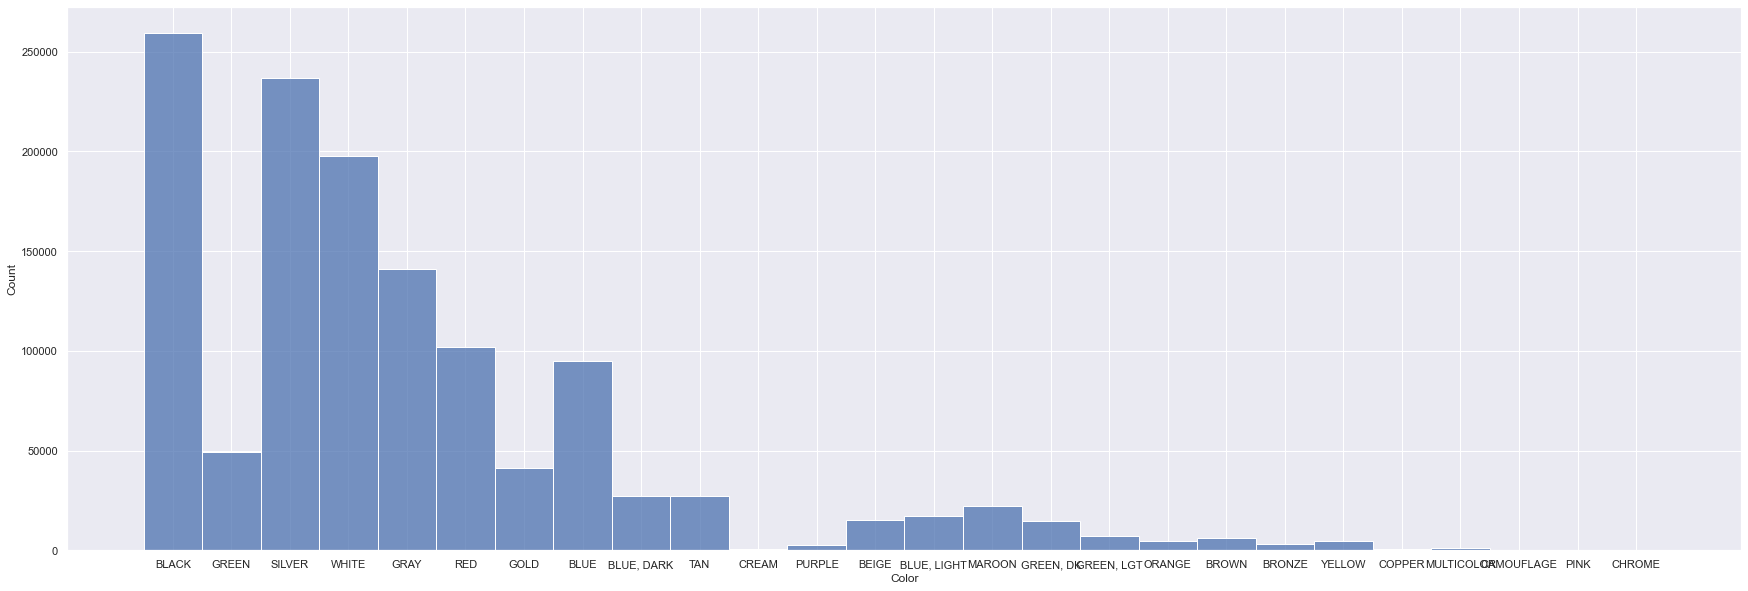

In [16]:
sns.set(rc = {'figure.figsize':(30, 10)})
sns.histplot(df.Color)